In [1]:
%reload_ext autoreload
%autoreload 2

from ripple_heterogeneity.utils import (
    functions,
    loading,
)
from ripple_heterogeneity.replay import replay_run, replay_fig, replay_participation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import pickle
import seaborn as sns
import nelpy as nel
import nelpy.plotting as npl
import random
from matplotlib.ticker import AutoMinorLocator
from nelpy.plotting.core import imagesc

functions.set_plotting_defaults()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
fig_save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\figures\panels'

In [75]:
df = pd.read_csv(r"Z:\home\ryanh\projects\ripple_heterogeneity\sessions.csv")
df

,Unnamed: 0,basepath,basename
0,0,Z:\Data\AYAold\AB1\day1,day1
1,1,Z:\Data\AYAold\AB3\AB3_38_41,AB3_38_41
2,2,Z:\Data\AYAold\AB3\AB3_42_46,AB3_42_46
3,3,Z:\Data\AYAold\AB3\AB3_47_49,AB3_47_49
4,4,Z:\Data\AYAold\AB3\AB3_50_51,AB3_50_51
...,...,...,...
304,304,Z:\Data\HMC2\day11,day11
305,305,Z:\Data\HMC2\day9,day9
306,306,Z:\Data\HMC2\day8,day8
307,307,Z:\Data\OMLproject\OML27\day3,day3


In [2]:
save_path = r"Z:\home\ryanh\projects\ripple_heterogeneity\replay_02_17_23"

df = replay_run.load_results(save_path,pre_task_post=False,verbose=False)

In [193]:
df.decoding_median_error

0         6.823437
1         6.823437
2         6.823437
3         6.823437
4         6.823437
            ...   
143598    7.766276
143599    7.766276
143600    7.766276
143601    7.766276
143602    7.766276
Name: decoding_median_error, Length: 143603, dtype: float64

In [12]:
df[["basepath","direction","decoding_median_error"]]

,basepath,direction,decoding_median_error
0,Z:\Data\AYAold\AB1\day1,outbound_epochs,6.823437
1,Z:\Data\AYAold\AB1\day1,outbound_epochs,6.823437
2,Z:\Data\AYAold\AB1\day1,outbound_epochs,6.823437
3,Z:\Data\AYAold\AB1\day1,outbound_epochs,6.823437
4,Z:\Data\AYAold\AB1\day1,outbound_epochs,6.823437
...,...,...,...
140256,Z:\Data\OMLproject\OML27\day3,inbound_epochs,7.766276
140257,Z:\Data\OMLproject\OML27\day3,inbound_epochs,7.766276
140258,Z:\Data\OMLproject\OML27\day3,inbound_epochs,7.766276
140259,Z:\Data\OMLproject\OML27\day3,inbound_epochs,7.766276


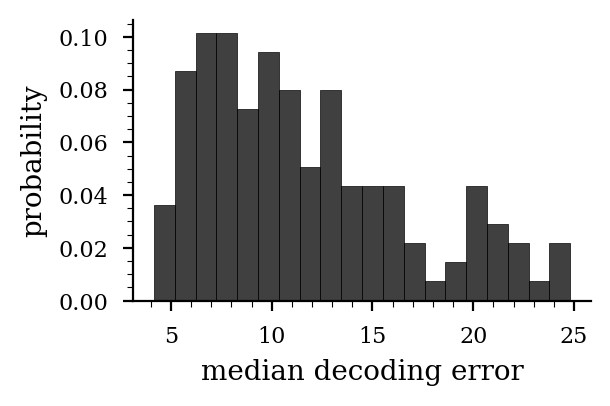

In [23]:
fig = plt.figure(
    figsize=functions.set_size("thesis", fraction=0.5, subplots=(1, 1)), edgecolor=None
)
sns.histplot(
    data=df.groupby(["basepath", "direction"])
    .decoding_median_error.mean()
    .reset_index(),
    x="decoding_median_error",
    stat="probability",
    bins=20,
    color="k"
)
sns.despine()
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
plt.xlabel("median decoding error")
plt.ylabel("probability")

plt.savefig(
    os.path.join(fig_save_path, "median_decoding_error_hist.svg"),
    dpi=300,
    bbox_inches="tight",
)
plt.show()

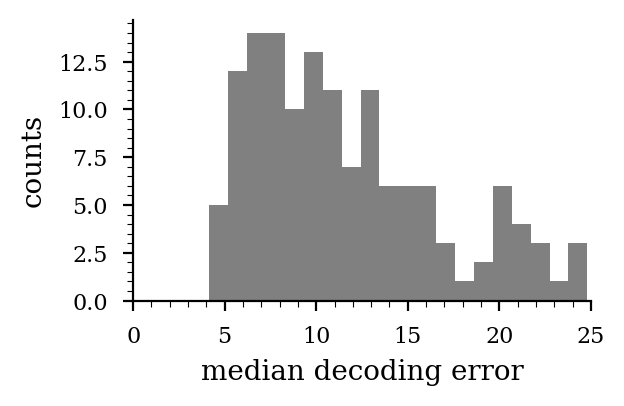

In [3]:
fig = plt.figure(
    figsize=functions.set_size("thesis", fraction=0.5, subplots=(1, 1)), edgecolor=None
)
plt.hist(df.decoding_median_error.unique(),20,color="grey")
plt.xlim(0,25)
sns.despine()
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
plt.xlabel("median decoding error")
plt.ylabel("counts")
plt.show()

In [216]:
df.groupby(["basepath","direction"]).decoding_median_error.min().reset_index().sort_values("decoding_median_error")

,basepath,direction,decoding_median_error
81,Z:\Data\GirardeauG\Rat11\Rat11-20150330,inbound_epochs,4.162102
83,Z:\Data\GirardeauG\Rat11\Rat11-20150331,inbound_epochs,4.343617
1,Z:\Data\AYAold\AB3\AB3_38_41,inbound_epochs,4.606225
90,Z:\Data\HMC1\day10,inbound_epochs,4.857155
27,Z:\Data\Can\OML22\day8,inbound_epochs,4.863393
...,...,...,...
8,Z:\Data\AYAold\AYA4\day150804,outbound_epochs,22.695466
112,Z:\Data\Kenji\ec013.540_561,inbound_epochs,23.086140
65,Z:\Data\GirardeauG\Rat11\Rat11-20150314,outbound_epochs,23.978968
36,Z:\Data\GirardeauG\Rat08\Rat08-20130716,outbound_epochs,24.400888


In [25]:
# basepath = r"Z:\Data\OMLproject\OML27\day3"
# basepath = r"Z:\Data\GirardeauG\Rat11\Rat11-20150330"
basepath = r"Z:\Data\GirardeauG\Rat11\Rat11-20150331"
basepath = r"Z:\Data\AYAold\AB3\AB3_38_41"
# load our spikes
st, cell_metrics = loading.load_spikes(
    basepath, putativeCellType="Pyr", brainRegion="CA1"
)

# load session epochs, these are to find linear track epoch
epoch_df = loading.load_epoch(basepath)
beh_epochs = nel.EpochArray([np.array([epoch_df.startTime, epoch_df.stopTime]).T])

# load animal position
pos, outbound_epochs, inbound_epochs = replay_run.handle_behavior(
    basepath,
    epoch_df,
    beh_epochs,
    restrict_manipulation=False,
)

In [26]:
# construct tuning curves
ds_50ms = 0.05
s_binsize = 3
tuning_curve_sigma = 3
speed_thres = 4
place_cell_min_spks=100
place_cell_peak_mean_ratio=1
place_cell_min_rate=1
ds_beh_decode = .2

tc, st_run, bst_run = replay_run.get_tuning_curves(
    pos, st, inbound_epochs, speed_thres, ds_50ms, s_binsize, tuning_curve_sigma
)

(
    sta_placecells,
    tc,
    bst_run,
    cell_metrics_,
    total_units,
) = replay_run.restrict_to_place_cells(
    tc,
    st_run,
    bst_run,
    st,
    cell_metrics,
    place_cell_min_spks,
    place_cell_min_rate,
    place_cell_peak_mean_ratio,
)
bst_run_beh = sta_placecells[inbound_epochs].bin(ds=ds_beh_decode)


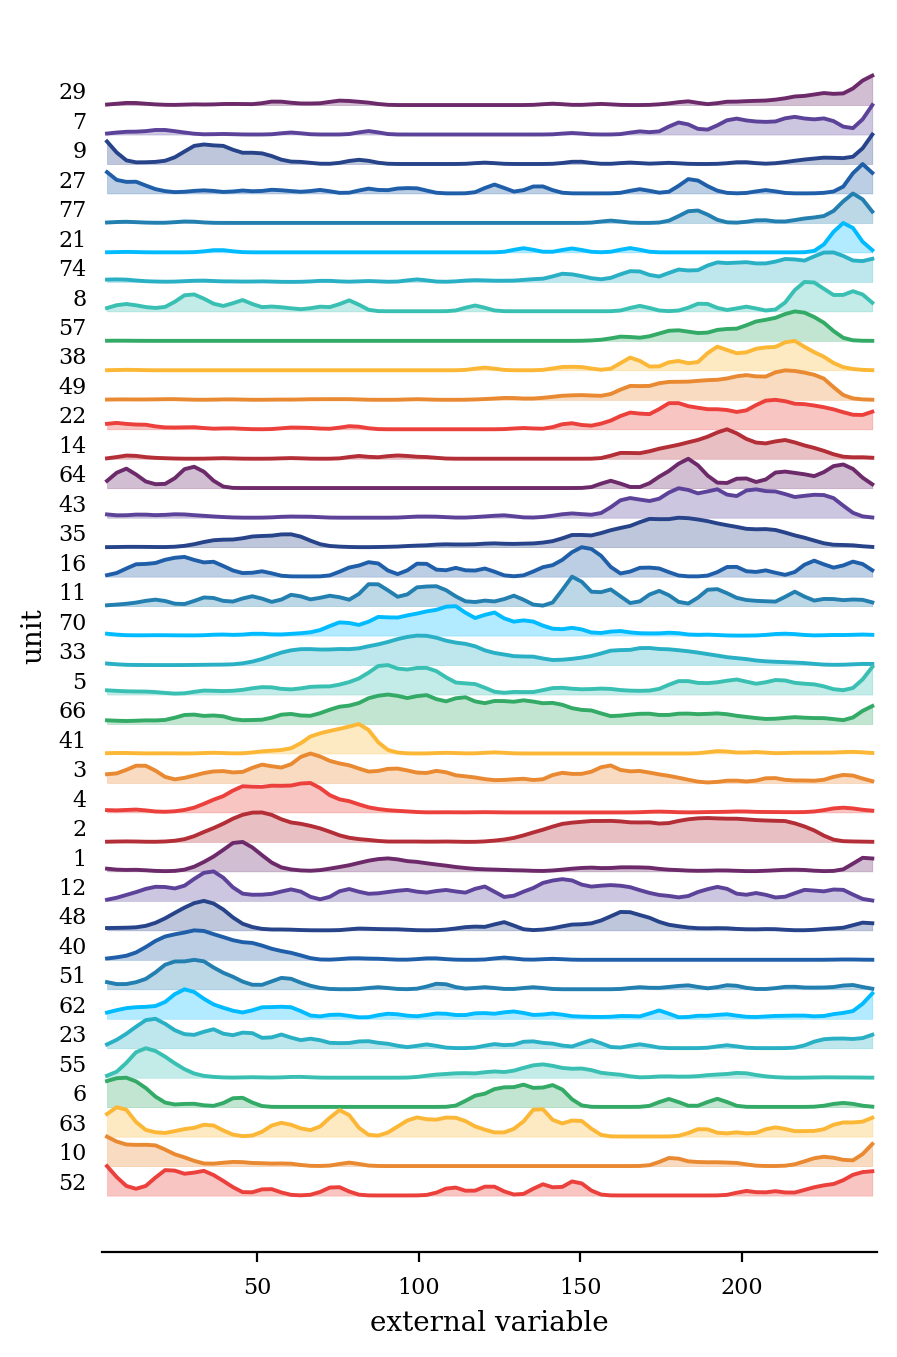

In [27]:
tc_reordered = tc.reorder_units()
npl.set_palette(npl.colors.rainbow)
with npl.FigureManager(show=True, figsize=(5, 8)) as (fig, ax):
    npl.utils.skip_if_no_output(fig)
    npl.plot_tuning_curves1D(tc_reordered, normalize=True, pad=1)


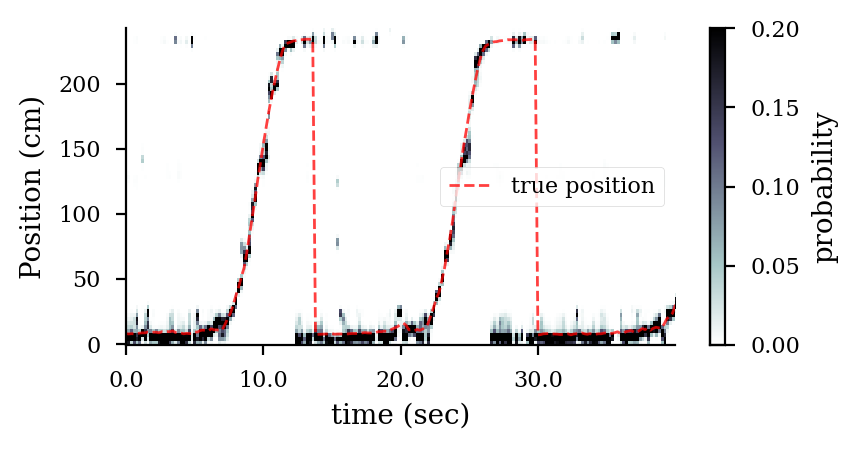

In [50]:
# this line runs the decoder
posteriors, lengths, mode_pth, mean_pth = nel.decoding.decode1D(
    bst_run_beh.smooth(sigma=.1), tc, xmin=np.nanmin(pos.data), xmax=np.nanmax(pos.data)
)

fig = plt.figure(
    figsize=functions.set_size("thesis", fraction=0.75, subplots=(1.5, 2)), edgecolor=None
)
ax = plt.gca()
n_ext, n_bins = posteriors.shape
ax, im = imagesc(
    x=np.arange(n_bins),
    y=np.arange(int(tc.bins[-1] + 1)),
    data=posteriors,
    cmap="bone_r",
    ax=ax,
    vmax=0.2,
)
cbar = plt.colorbar(im)
cbar.set_label("probability")
actual_pos = np.interp(bst_run_beh.bin_centers, pos.abscissa_vals, pos.data[0])

plt.plot(actual_pos, "--r", linewidth=1,label="true position",alpha=.75)
plt.xlim(200, 400)
locs, labels = plt.xticks() 
plt.xticks(np.arange(200, 400, step=50))
plt.xticks(np.arange(200, 400, step=50), (np.arange(200, 400, step=50) - 200) * .2) 
plt.legend()
sns.despine()
plt.xlabel("time (sec)")
plt.ylabel("Position (cm)")

plt.savefig(
    os.path.join(fig_save_path, "position_decoding_example.svg"),
    dpi=300,
    bbox_inches="tight",
)
plt.show()

In [45]:
200/5

40.0

In [43]:
(np.arange(200, 400, step=50) - 200) * .2

array([ 0., 10., 20., 30.])

In [312]:
bad_idx = np.isnan(actual_pos) | np.isnan(mode_pth)
actual_pos = actual_pos[~bad_idx]
mode_pth = mode_pth[~bad_idx]
median_error = np.nanmedian(np.abs(actual_pos - mode_pth))
median_error

4.150158660087811

<AxesSubplot: >

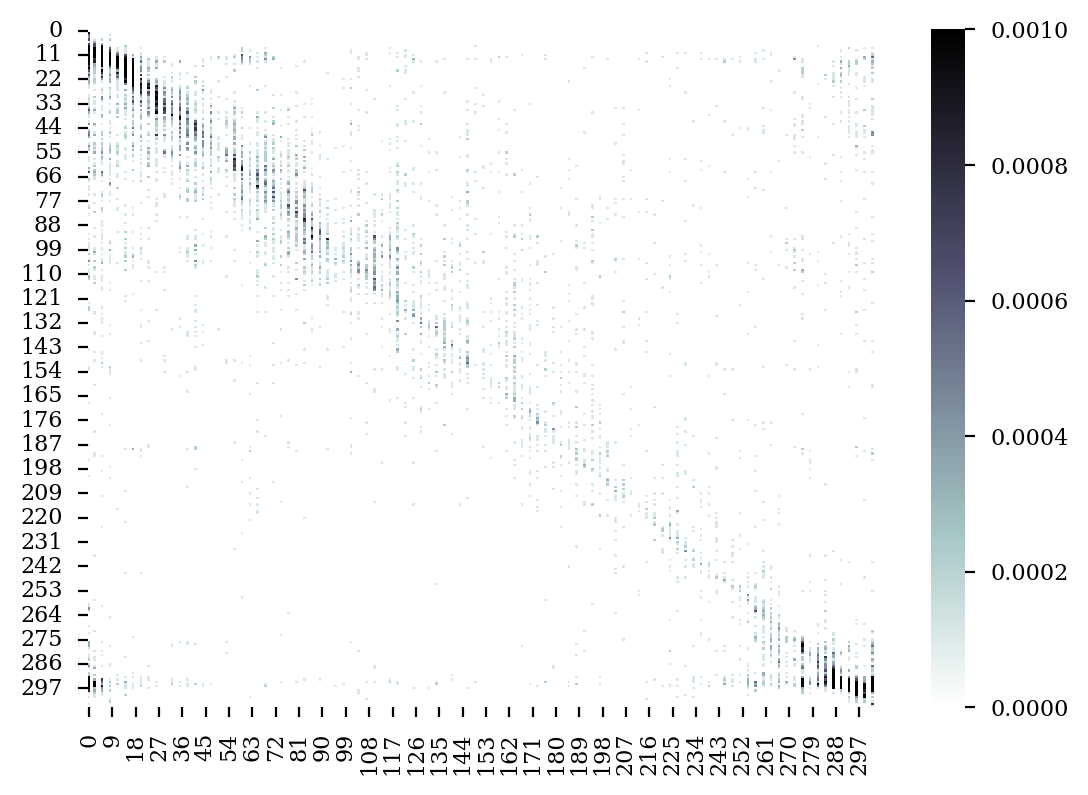

In [124]:
from sklearn.metrics import confusion_matrix
bad_idx = np.isnan(actual_pos) | np.isnan(mode_pth)
actual_pos = actual_pos[~bad_idx]
mode_pth = mode_pth[~bad_idx]
cm = confusion_matrix(actual_pos.astype(int), mode_pth.astype(int),normalize="all")

sns.heatmap(cm,cmap="bone_r",vmax=.001)

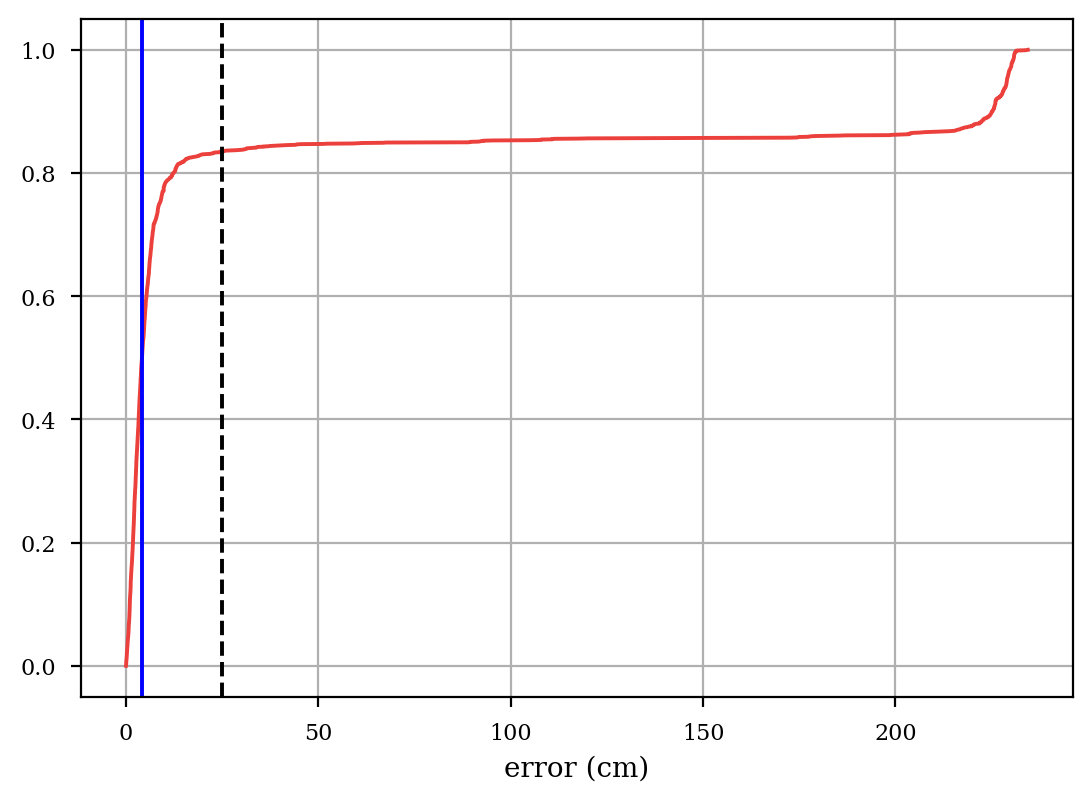

In [313]:
plt.plot(np.sort(np.abs(actual_pos - mode_pth)),np.linspace(0,1,len(actual_pos)))
plt.xlabel("error (cm)")
plt.axvline(np.nanmedian(np.abs(actual_pos - mode_pth)),color="b")
plt.axvline(25,color="k",linestyle="--")
plt.grid()

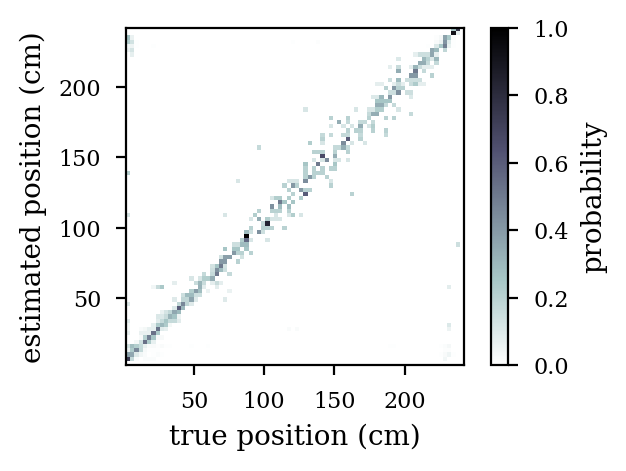

In [308]:
fig = plt.figure(
    figsize=functions.set_size("thesis", fraction=0.6, subplots=(1, 1)), edgecolor=None
)
H, xedges, yedges = np.histogram2d(actual_pos, mode_pth,bins=(tc.bins, tc.bins))
H = H / np.sum(H, axis=1, keepdims=True)

ax, im = imagesc(
    x=tc.bin_centers,
    y=tc.bin_centers,
    data=H,
    cmap="bone_r",
    ax=plt.gca(),
    vmax=1,
)
plt.gca().set_aspect('equal', 'box')

plt.xlabel("true position (cm)")
plt.ylabel("estimated position (cm)")
cbar = plt.colorbar(im)
cbar.set_label("probability")

plt.savefig(
    os.path.join(fig_save_path, "decoding_confusion_matrix.svg"),
    dpi=300,
    bbox_inches="tight",
)

In [145]:
import math
# actual_pos_binned = [math.ceil(val / 10) * 10 for val in actual_pos]
# mode_pth_binned = [math.ceil(val / 10) * 10 for val in mode_pth]

actual_pos_binned = actual_pos.astype(int)
mode_pth_binned = mode_pth.astype(int)

In [149]:
np.sum(conf_mat, axis=1, keepdims=True).shape

(306, 1)

<AxesSubplot: >

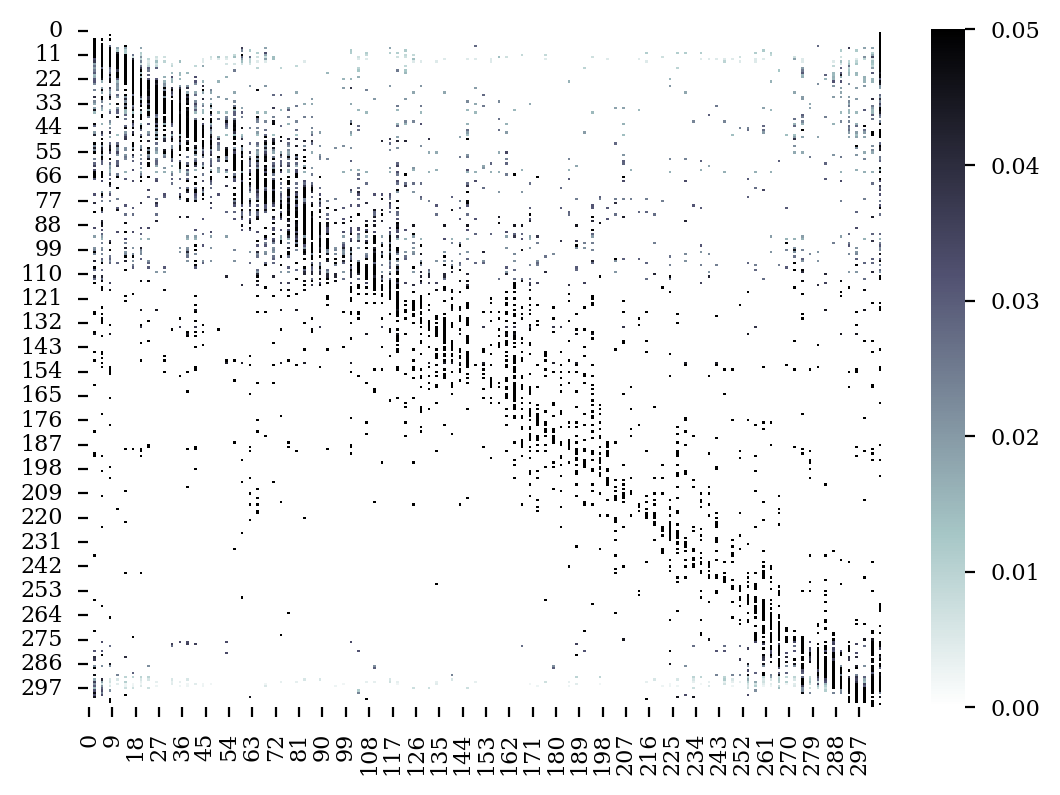

In [147]:
np.unique([actual_pos_binned,mode_pth_binned])

num_true_pos = np.hstack([actual_pos_binned,mode_pth_binned]).max() - np.hstack([actual_pos_binned,mode_pth_binned]).min()

conf_mat = np.zeros((num_true_pos, num_true_pos))

# Compute the confusion matrix
for i in range(len(actual_pos_binned)):
    conf_mat[actual_pos_binned[i]-1, mode_pth_binned[i]-1] += 1

# Normalize the confusion matrix to show conditional distributions
conf_mat_norm = conf_mat / np.sum(conf_mat, axis=1, keepdims=True)

sns.heatmap(conf_mat_norm,cmap="bone_r",vmax=.05)

12.629212250657318

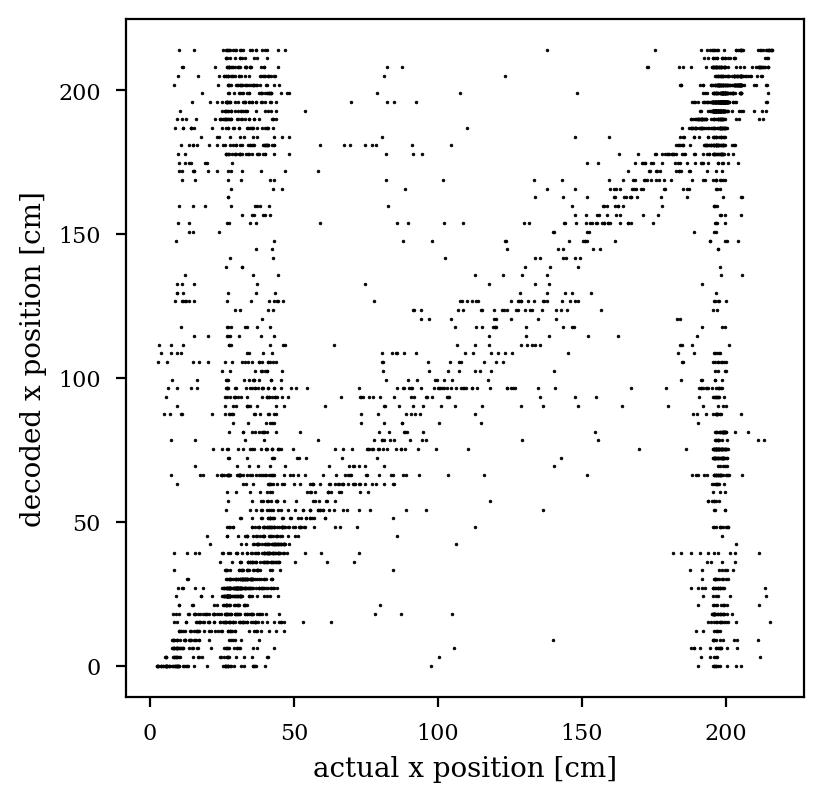

In [228]:
plt.scatter(actual_pos, mode_pth, color="k", s=1)
plt.axis("square")
# plt.axis("equal")

plt.xlabel("actual x position [cm]")
plt.ylabel("decoded x position [cm]")


# actual_pos = pos(bst_run.bin_centers)
median_error = np.nanmedian(np.abs(actual_pos - mode_pth))

median_error

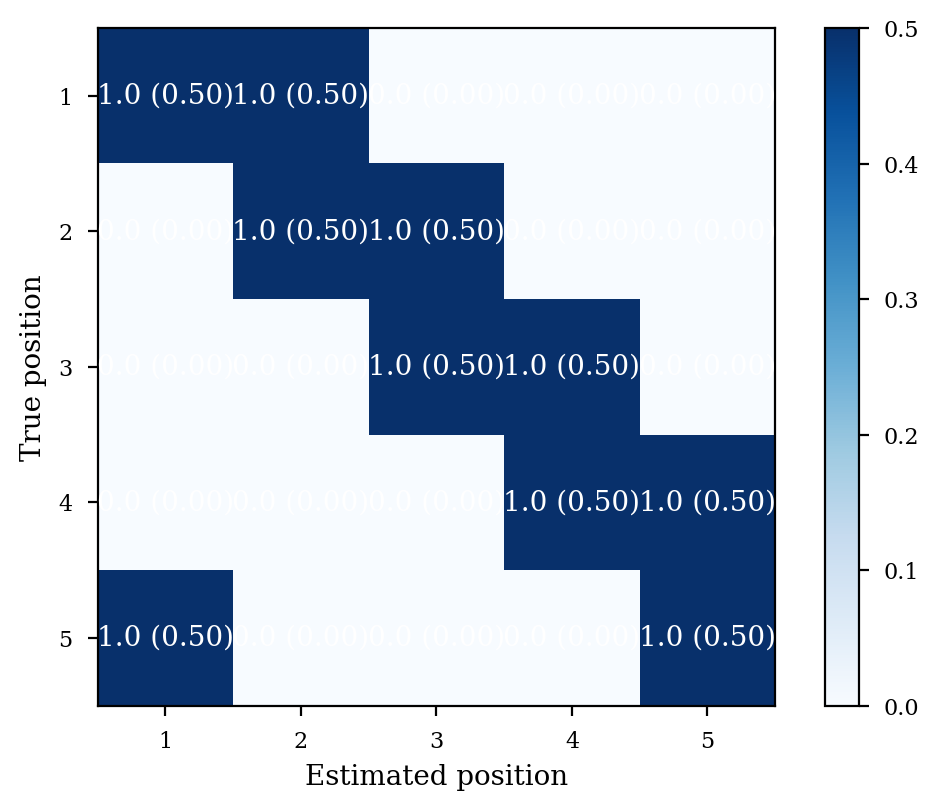

In [101]:
import numpy as np
import matplotlib.pyplot as plt

# Example data - true positions of the rat on the track
true_pos = [1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

# Example data - estimated positions of the rat on the track
est_pos = [1, 2, 3, 4, 5, 2, 3, 4, 5, 1]

# Define the number of true and estimated positions
num_true_pos = 5
num_est_pos = 5

# Initialize the confusion matrix
conf_mat = np.zeros((num_true_pos, num_est_pos))

# Compute the confusion matrix
for i in range(len(true_pos)):
    conf_mat[true_pos[i]-1, est_pos[i]-1] += 1

# Normalize the confusion matrix to show conditional distributions
conf_mat_norm = conf_mat / np.sum(conf_mat, axis=1, keepdims=True)

# Plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(conf_mat_norm, cmap='Blues')

# Set the axis labels
ax.set_xticks(np.arange(num_est_pos))
ax.set_yticks(np.arange(num_true_pos))
ax.set_xticklabels(np.arange(1,num_est_pos+1))
ax.set_yticklabels(np.arange(1,num_true_pos+1))
ax.set_xlabel('Estimated position')
ax.set_ylabel('True position')

# Add the colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Loop over data dimensions and create text annotations
for i in range(num_true_pos):
    for j in range(num_est_pos):
        text = ax.text(j, i, f'{conf_mat[i, j]} ({conf_mat_norm[i, j]:.2f})',
                       ha="center", va="center", color="w")

# Show the plot
plt.show()
